# Task Assignment Resilience Analysis

In [1]:
%reload_ext autoreload
%autoreload 2
from matplotlib.cm import viridis
import matplotlib.pyplot as plt
from numpy.random import default_rng
from taadaptivity.model import TaskModel

RNG = default_rng(98820557)


# Helpers
def sample_seed(rng, size = None):
    """Use the given RNG to sample new seeds for other numpy RNGs."""
    return rng.integers(2**63, size = size)

## Tasks per Agent over Time

<Axes: xlabel='Step', ylabel='Task Load'>

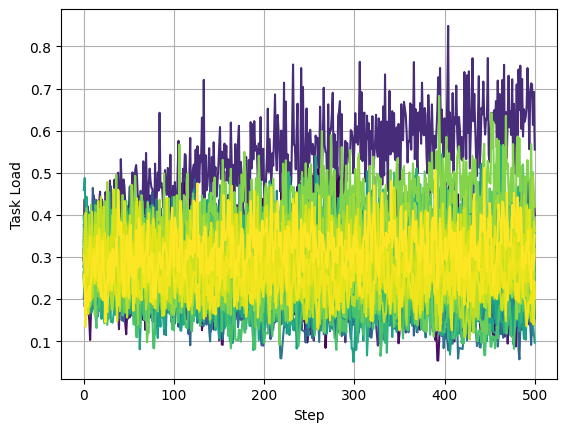

In [2]:
# Parameters
PARAMS = {"num_agents": 50, "t_new": 10, "loc": 50,
          "scale": 8.5, "performance": 0.01, "init_task_count": 15}

# Run ABM
abm = TaskModel(PARAMS, max_steps = 500, seed = sample_seed(RNG))
abm.run_model()

# Plot measured agent load
agent_df = abm.datacollector.get_agent_vars_dataframe()
agent_df.unstack().plot.line(cmap = viridis, ylabel = "Task Load", legend = False, grid = True)
# Unstack transforms into: rows=timestep, cols=AgentIDs
    

## Agent Failure vs. Heterogeneity Plot 

2d-Histogram:
- y: Failed Agents
- x: Agent Heterogeneity $\sigma$

## Systemic Risk Plot

Altitude plot:
- x: Time
- y: Agent Heterogeneity $\sigma$
- z: Shannon Entropy